# Natural Language Processing - Sentiment Analysis
An example in a few of the steps of NLP. Specifically focused on Sentiment Analysis.

We will be working with a set of 100,000 Amazon reviews.

pip install ipykernel nltk pandas seaborn

## 1. Import Libraries

In [1]:
import pandas as pd
import nltk
from nltk.probability import FreqDist
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /Users/thinkalex/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/thinkalex/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/thinkalex/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## 2. Data Loading and Understanding

In [3]:
df = pd.read_csv("data/reviews.csv")

In [4]:
df.columns
df.shape
df.head(n=10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,238216,B002JVPFZ8,A1B563ESLJ4EAU,Matthew Carney,2,2,5,1258416000,love 'em!,Someone gave me half a pack several years ago....
1,1392,B00068PCTU,A1WVOM1UQU9ZN0,carola whitlow,0,0,5,1340496000,The World's Best Sweetener,Stevia is pretty much the only natural zero-ca...
2,495917,B004UBCJ5Y,A1PDFBS64JCPQC,AC,0,1,1,1334620800,Taste Like Movie Popcorn,Thinking these would be good for an upcoming b...
3,449823,B000E8PZNA,A2FX2RPCHQ1P41,"M. Coggin ""Clean Life""",6,6,5,1194912000,"Excellent tea with different, full flavor","The six pack is a good value, really no more t..."
4,530212,B003NC749C,A2GCRABUU8351C,MommaG,1,2,2,1285632000,Too bland.,Flavor is too subtle. I found myself putting ...
5,378055,B002GJ9JY6,A1I6O6YH6TFVID,Alison,2,2,3,1321833600,Powdered peanut butter,PB2 turned out to be a pretty good alternative...
6,305658,B001ELL4E0,A2T0V99GLGXWCM,Ghost(Ghost(M)),0,0,5,1291248000,Good product,That's my first attempt try cut oats (rather t...
7,331143,B001THPU9E,AJQQABYMHY6NV,"P. LaRue ""drpam24""",0,0,4,1256688000,tasty,"Good flavor alone, I usually mix w/ arnold pal..."
8,48770,B005Y1A8FW,A33OA3JH3YYPW5,Dara Shirokawa,6,6,5,1257897600,Happy With Product,This product is sturdy and well made. The por...
9,491124,B00196498I,A1E2IHU91M6WJJ,optimizeyourvideo,0,0,5,1350172800,Great buy even cheaper on subscription,I lost nearly 20lbs by adding 4 Tbsp to my oat...


## 3. Minimal Exploratory Data Analysis

In [5]:
# How many unique products are there?
len(df["ProductId"].unique())

31761

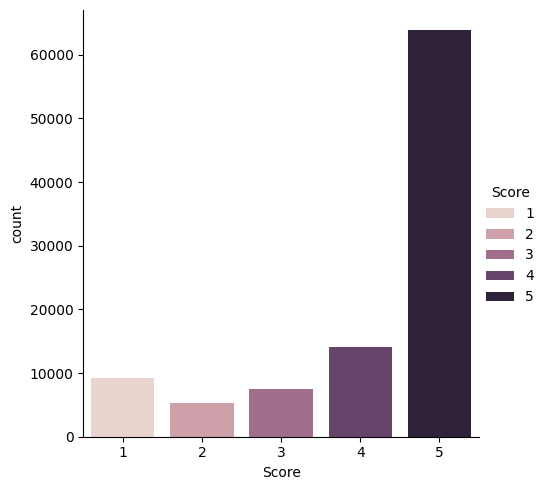

In [6]:
# How many of each rating there are
ax = sns.catplot(data=df, x='Score', kind="count", hue='Score')
plt.show()

## 4. Example Text Pre-Processing

### Tokenization
Breaking the text into sentences, phrases, words, and symbols.

In [7]:
# Get a random review
review = df["Text"][35]
review

# Tokenize using nltk
tokens = nltk.word_tokenize(review)

# Display first 10 words
tokens[:10]

['I',
 "'ve",
 'been',
 'giving',
 'my',
 'daughter',
 'Gerber',
 'fruits',
 ',',
 'veggies']

### Frequency Distribution

In [8]:
fdist = FreqDist(tokens)
fdist.most_common(10)

[(',', 10),
 ('and', 10),
 ('she', 7),
 ('to', 5),
 ('fruits', 4),
 ('.', 4),
 ('I', 3),
 ('Gerber', 3),
 ('veggies', 3),
 ("'s", 3)]

### Stemming
Cutting off the ends of the words to get some type of root

In [9]:
# Stemming - cuts off the ends of a word
lst = LancasterStemmer()
print("fridge: ", lst.stem("fridge"))
print("fridges: ", lst.stem("fridges"))

fridge:  fridg
fridges:  fridg


### Lemmatization
Determining the roots of words

In [10]:
# Lemmatizing - helps find the root of a word
lmt = WordNetLemmatizer()

print("better:", lmt.lemmatize("better", pos="a"))
print("alumni:", lmt.lemmatize("alumni", pos="n"))

better: good
alumni: alumnus


### Part of Speech Tagging

In [11]:
tagged = nltk.pos_tag(tokens)

# Display the first 10
tagged[:10]

[('I', 'PRP'),
 ("'ve", 'VBP'),
 ('been', 'VBN'),
 ('giving', 'VBG'),
 ('my', 'PRP$'),
 ('daughter', 'NN'),
 ('Gerber', 'NNP'),
 ('fruits', 'NNS'),
 (',', ','),
 ('veggies', 'NNS')]

## 5. Sentiment Analysis

In [12]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()

In [13]:
sia.polarity_scores("I am extremely happy!")

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [14]:
# Get just a 100 reviews to make it simple
df1 = df.sample(100)

In [20]:
# Return the sentiment score of each review
def get_polarity_scores(review):
    scores = sia.polarity_scores(review)
    return scores['neg'], scores['pos'], scores['neu'], scores['compound']

# Apply polarity scoring function and save scores into separate columns
df1[['Negative', 'Positive', 'Neutral', 'Compound']] = df1['Text'].apply(lambda x: pd.Series(get_polarity_scores(x)))

In [21]:
df1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Negative,Positive,Neutral,Compound
20759,13609,B001E5E33A,A17TASZJT6Y39D,"Mr. August ""Literature lover""",0,0,5,1345593600,Decaf Tea Choice,A distinctive decaf tea is hard to find. I wa...,0.234,0.062,0.704,-0.9143
3708,149048,B004Q3LBTG,A2FC9SA2OW855O,Harsha,1,1,5,1315353600,Making baby food is a breeze,I have had this product for a few weeks now. I...,0.000,0.228,0.772,0.8122
76491,539946,B000V17MJA,A3FX8CJUZL6JWJ,"Napleskitty ""napleskitty""",1,1,5,1322524800,best energy drink ever,It has a very good taste and gives you energy ...,0.108,0.221,0.671,0.8232
49261,430003,B000RO14IQ,AC985IRTXGTE3,PippaM,0,0,4,1319932800,Good flavor,This flavor is really yummy. It's better to ea...,0.000,0.265,0.735,0.7818
82097,409960,B004AWTR6M,A3U7Q41SJ4PWI,E. Maddox,0,0,5,1297382400,A great treat to drink,Absolutely delightful. I love it. Bought fou...,0.035,0.375,0.590,0.9610


## 6. Visualization

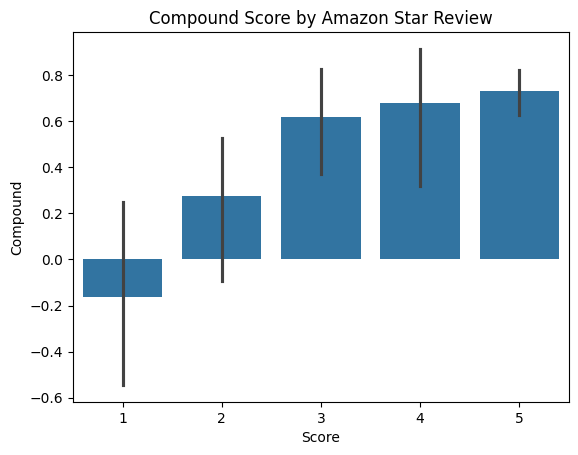

In [22]:
# Graph it
ax = sns.barplot(data=df1, x='Score', y='Compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()